In [1]:

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [4]:

X_train = np.loadtxt('input.csv', delimiter = ',')
Y_train = np.loadtxt('labels.csv', delimiter = ',')

X_test = np.loadtxt('input_test.csv', delimiter=',')
Y_test = np.loadtxt('labels_test.csv', delimiter=',')




In [5]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

X_train = X_train/255.0
X_test = X_test/255.0


In [6]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", Y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of Y_test: ", Y_test.shape)


Shape of X_train:  (2000, 100, 100, 3)
Shape of Y_train:  (2000, 1)
Shape of X_test:  (400, 100, 100, 3)
Shape of Y_test:  (400, 1)


In [9]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100,100,3)),

    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(64, activation='relu'),
  

])

c:\Users\sagar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [24]:

model.compile(loss = 'binary_crossentropy' , optimizer = 'adam', metrics= ['accuracy'])

In [25]:
model.fit(X_train, Y_train, epochs=5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.9670 - loss: 0.0988
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9960 - loss: 0.0242
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.9983 - loss: 0.0161
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 1.0000 - loss: 0.0113
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 1.0000 - loss: 0.0103


In [19]:
model.fit(X_train, Y_train, epochs=5, batch_size =64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 160ms/step - accuracy: 0.9748 - loss: 0.1043
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - accuracy: 0.9690 - loss: 0.1016
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 157ms/step - accuracy: 0.9841 - loss: 0.0695
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 154ms/step - accuracy: 0.9935 - loss: 0.0431
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 159ms/step - accuracy: 0.9915 - loss: 0.0409


In [22]:
model.evaluate(X_test, Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6640 - loss: 1.2401


[1.1049898862838745, 0.6850000023841858]

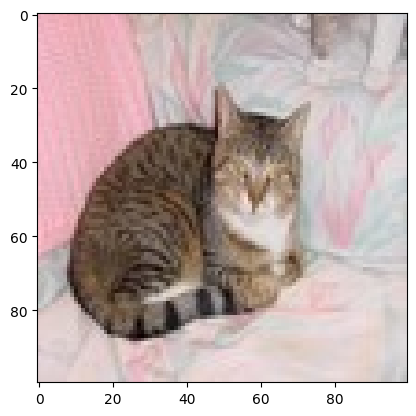

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Our model says it is a :  CAT


In [26]:
idx2 = random.randint(0,len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred = y_pred >0.5

if(y_pred == 0):
    pred = 'DOG'
else:
    pred = 'CAT'
print("Our model says it is a : ", pred)        
